#### Principal Component Analysis

- Dimensionality Reduction Method
- Implementation using Python

#### 1) Importing python libraries and basic EDA (Exploratory data analysis)

In [1]:
#importing python libraries

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#importing sklearn libraries of built in models
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#libraries for evaluating model output
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
#loading mnist dataset

mnist_train = pd.read_csv('mnist_train.csv',header=None)
mnist_test = pd.read_csv('mnist_test.csv',header=None)

In [3]:
#checking rows and columns of train set

mnist_train.shape

(6000, 785)

In [4]:
#checking rows and columns of test set

mnist_test.shape

(1000, 785)

In [5]:
#basic eda of train set

mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#basic eda test set

mnist_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#exploring further

mnist_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 785 entries, 0 to 784
dtypes: float64(785)
memory usage: 35.9 MB


In [8]:
mnist_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, 0 to 784
dtypes: float64(785)
memory usage: 6.0 MB


#### 2) Splitting data to use for model building and evaluation

In [9]:
#splitting into X and y variables using train set

X = mnist_train.iloc[:,1:]
y = mnist_train.iloc[:,0]

In [10]:
#checking splitted dataset

X.shape

(6000, 784)

In [11]:
#checking splitted dataset

y.shape

(6000,)

In [12]:
#checking samples of X and y

X.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y.head()

0    5.0
1    0.0
2    4.0
3    1.0
4    9.0
Name: 0, dtype: float64

In [14]:
#splitting train and validation set

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.30,shuffle=True)

In [15]:
#checking train and validation sets

print(X_train.shape)
print(X_val.shape)

(4200, 784)
(1800, 784)


In [16]:
print(y_train.shape)
print(y_val.shape)

(4200,)
(1800,)


In [17]:
#splitting test set

X_test = mnist_test.iloc[:,1:]
y_test = mnist_test.iloc[:,0]

In [18]:
#checking splitted test dataset

print(X_test.shape)
print(y_test.shape)

(1000, 784)
(1000,)


In [19]:
X_test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y_test.head()

0    6.0
1    0.0
2    1.0
3    1.0
4    5.0
Name: 0, dtype: float64

In [21]:
#scaling the data - for purpose of additional analysis - as part of experiments

std_scaler = StandardScaler()

In [22]:
#fitting on train set

std_scaler.fit(X_train)

StandardScaler()

In [23]:
#applying on train and set

X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [24]:
#applying on validation set

X_val_scaled = std_scaler.transform(X_val)

#### 3) Implementing PCA and checking the classified output

##### 3.1) PCA Implementation 

In [25]:
class PrincipalComponentAnalysis:
    
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eigen_vectors = None
        self.mean = None
        
    def fit(self,X):
        n,m = X.shape
        self.mean = X.mean(axis=0)
        X = X - self.mean
        
        #calculating covariance matrix
        
        cov_matrix = np.dot(X.T,X) / (n-1)
        cov_matrix = cov_matrix.real
        
        #calculating eigenvalues and eigenvectors
        
        eig_values,eig_vectors = np.linalg.eig(cov_matrix)
        
        eig_vectors = eig_vectors.T.real
        
        #sorting eigenvectors
        
        decreasing_sort = np.flip(np.argsort(eig_values))
        
        eig_values = eig_values[decreasing_sort]
        eig_vectors = eig_vectors[decreasing_sort]
        
        # store first n eigenvectors
        self.eigen_vectors = eig_vectors[0:self.n_components]
        #print(self.eigen_vectors)
        
    def transform(self,X):
        X = X - self.mean
        return np.dot(X,self.eigen_vectors.T)
     


##### 3.1.1) Using implemented PCA with dimension 784 - appyling data on KNN classification model for classification

In [26]:
#applying above implemented class of pca with 784 dimensions on mnist data

pca_model = PrincipalComponentAnalysis()

In [27]:
#applying fit method

pca_model.fit(X_train)

In [28]:
X_train_pca_transformed = pca_model.transform(X_train)
X_val_pca_transformed = pca_model.transform(X_val)

In [29]:
#verifying output

print(X_train_pca_transformed.shape)
print(X_val_pca_transformed.shape)

(4200, 784)
(1800, 784)


In [30]:
#using the data on 1 - knn to perform classification - instantiating the 1-KNN model

knn_model = KNeighborsClassifier(n_neighbors=1)

In [31]:
#checking ouput of 1NN on pca applied dataset

knn_model.fit(X_train_pca_transformed,y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
y_pred = knn_model.predict(X_val_pca_transformed)

In [33]:
#comparing output

print(y_pred)
print(y_val.head())

[3. 9. 6. ... 7. 0. 9.]
2536    3.0
3508    9.0
4765    6.0
2239    6.0
4228    4.0
Name: 0, dtype: float64


In [34]:
#evaluating performance of implemented model

print("Validation accuracy : ", accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))

Validation accuracy :  0.9405555555555556
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       162
         1.0       0.92      0.99      0.95       208
         2.0       0.97      0.94      0.95       176
         3.0       0.94      0.94      0.94       213
         4.0       0.98      0.91      0.94       180
         5.0       0.93      0.90      0.92       156
         6.0       0.95      0.97      0.96       202
         7.0       0.92      0.95      0.94       189
         8.0       0.98      0.87      0.92       151
         9.0       0.87      0.93      0.90       163

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800



In [35]:
#transforming/reducing test data by applying pca on test data

X_test_pca_transformed = pca_model.transform(X_test)

In [36]:
#verifying output

print(X_test_pca_transformed.shape)

(1000, 784)


In [37]:
#predicting or classifying output for test set

y_pred_test = knn_model.predict(X_test_pca_transformed)

In [38]:
#evaluating performance of implemented model

print("Test accuracy : ", accuracy_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Test accuracy :  0.92
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        99
         1.0       0.96      0.99      0.97       113
         2.0       0.97      0.91      0.94        94
         3.0       0.92      0.84      0.88       108
         4.0       0.94      0.88      0.91        93
         5.0       0.93      0.92      0.92        96
         6.0       0.90      1.00      0.95       101
         7.0       0.92      0.84      0.88       103
         8.0       0.97      0.87      0.91        99
         9.0       0.77      0.96      0.85        94

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



##### 3.1.2) Using implemented PCA for various dimension in range 512 to 2 - appyling updated data on KNN classification model for classification - experiments

In [39]:
#intializing in a variable different dimension counts

dimension_count = [2,4,10,16,32,64,128,256,512]

In [40]:
#creating a function to try different dimensions

for i in dimension_count:
    
    pca_model = PrincipalComponentAnalysis(i)
    
    #fitting model
    
    pca_model.fit(X_train)
    
    #transforming dataset
    
    X_train_pca_transformed = pca_model.transform(X_train)
    X_val_pca_transformed = pca_model.transform(X_val)
    
    print('For {} dimensions/features,'.format(i))
    print("Train shape : ", X_train_pca_transformed.shape)
    print("Validation shape : ", X_val_pca_transformed.shape)
    
    #applying 1-Knn
    
    knn_model.fit(X_train_pca_transformed,y_train)
    
    y_pred = knn_model.predict(X_val_pca_transformed)
    
    #evaluating output for train set
    
    print("Validation Accuracy : ", accuracy_score(y_val,y_pred))
    print(classification_report(y_val,y_pred))
    print("\n")
    
    #transforming/reducing test data by applying pca on test data

    X_test_pca_transformed = pca_model.transform(X_test)
    
    #checking reduced dimension
    print('For {} components,'.format(i))
    print("Test shape : ", X_test_pca_transformed.shape)
    
    #predicting or classifying output for test set

    y_pred_test = knn_model.predict(X_test_pca_transformed)
    
    #evaluating performance of implemented model on test set

    print("Test accuracy : ", accuracy_score(y_test,y_pred_test))
    print(classification_report(y_test,y_pred_test))


For 2 dimensions/features,
Train shape :  (4200, 2)
Validation shape :  (1800, 2)
Validation Accuracy :  0.39
              precision    recall  f1-score   support

         0.0       0.66      0.70      0.68       162
         1.0       0.89      0.90      0.89       208
         2.0       0.27      0.28      0.28       176
         3.0       0.41      0.38      0.40       213
         4.0       0.29      0.31      0.30       180
         5.0       0.16      0.15      0.15       156
         6.0       0.31      0.28      0.29       202
         7.0       0.38      0.35      0.37       189
         8.0       0.17      0.17      0.17       151
         9.0       0.23      0.26      0.24       163

    accuracy                           0.39      1800
   macro avg       0.38      0.38      0.38      1800
weighted avg       0.39      0.39      0.39      1800



For 2 components,
Test shape :  (1000, 2)
Test accuracy :  0.414
              precision    recall  f1-score   support

         

For 64 dimensions/features,
Train shape :  (4200, 64)
Validation shape :  (1800, 64)
Validation Accuracy :  0.9483333333333334
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       162
         1.0       0.95      0.99      0.97       208
         2.0       0.96      0.93      0.95       176
         3.0       0.94      0.95      0.95       213
         4.0       0.96      0.92      0.94       180
         5.0       0.93      0.92      0.93       156
         6.0       0.96      0.97      0.97       202
         7.0       0.95      0.95      0.95       189
         8.0       0.97      0.93      0.95       151
         9.0       0.88      0.93      0.90       163

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800



For 64 components,
Test shape :  (1000, 64)
Test accuracy :  0.938
              precision    recall  f1-score  

In [41]:
#plotting graph for different dimensions 

#trainset_acc = [0.3844444444444444,0.6111111111111112,0.8788888888888889,0.9338888888888889, 0.9361111111111111,0.9338888888888889,0.9277777777777778,0.925,0.9222222222222223,0.9227777777777778]
#testset_acc = [0.39,0.627,0.866,0.919,0.934,0.932,0.927,0.921,0.916,0.916]

In [42]:
#dim_used = [2,4,10,16,32,64,128,256,512,784]

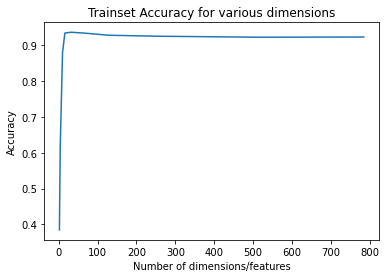

In [43]:
#plotting trainset accuracy for different dimensions

#plt.plot(dim_used,trainset_acc)
#plt.title("Trainset Accuracy for various dimensions")
#plt.xlabel("Number of dimensions/features")
#plt.ylabel("Accuracy")
#plt.show()

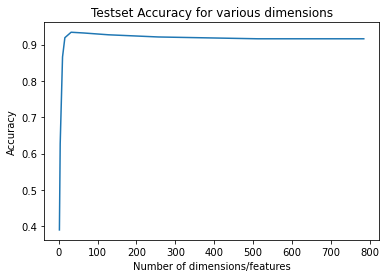

In [44]:
#plotting testset accuracy for different dimensions

#plt.plot(dim_used,testset_acc)
#plt.title("Testset Accuracy for various dimensions")
#plt.xlabel("Number of dimensions/features")
#plt.ylabel("Accuracy")
#plt.show()

##### 3.2) Using sklearn PCA to compare results with implemented model

##### 3.2.1) Using sklearn PCA with dimension 784 - appyling KNN classification model for classification

In [45]:
#using sklearn pca

pca = PCA(svd_solver='full')

In [46]:
#fitting on train data

pca.fit(X_train)

PCA(svd_solver='full')

In [47]:
#applying on train and validation set

X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

In [48]:
#checking data after using PCA

print(X_train_pca.shape)
print(X_val_pca.shape)

(4200, 784)
(1800, 784)


In [49]:
#fitting train set on instance of model created above

knn_model.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
#predicting using validation set

y_pred = knn_model.predict(X_val_pca)

In [51]:
print(y_pred)
print(y_val.head())

[3. 9. 6. ... 7. 0. 9.]
2536    3.0
3508    9.0
4765    6.0
2239    6.0
4228    4.0
Name: 0, dtype: float64


In [52]:
#evaluating the classifed output

print('Validation accuracy : ',  accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))

Validation accuracy :  0.9405555555555556
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       162
         1.0       0.92      0.99      0.95       208
         2.0       0.97      0.94      0.95       176
         3.0       0.94      0.94      0.94       213
         4.0       0.98      0.91      0.94       180
         5.0       0.93      0.90      0.92       156
         6.0       0.95      0.97      0.96       202
         7.0       0.92      0.95      0.94       189
         8.0       0.98      0.87      0.92       151
         9.0       0.87      0.93      0.90       163

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800



In [53]:
#applying on test set

X_test_pca = pca.transform(X_test)

In [54]:
#checking test data shape

print(X_test.shape)

(1000, 784)


In [55]:
#predicting or classifying output for test set

y_pred_test = knn_model.predict(X_test_pca)

In [56]:
#evaluating performance of implemented model

print("Test accuracy : ", accuracy_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Test accuracy :  0.92
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        99
         1.0       0.96      0.99      0.97       113
         2.0       0.97      0.91      0.94        94
         3.0       0.92      0.84      0.88       108
         4.0       0.94      0.88      0.91        93
         5.0       0.93      0.92      0.92        96
         6.0       0.90      1.00      0.95       101
         7.0       0.92      0.84      0.88       103
         8.0       0.97      0.87      0.91        99
         9.0       0.77      0.96      0.85        94

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



##### 3.2.2) Using sklearn PCA for different dimensions - appyling KNN classification model for classification

In [57]:
#creating a function to try different dimensions

for i in dimension_count:
    
    pca = PCA(svd_solver='full')
    pca.n_components = i
    
    #fitting model
    
    pca.fit(X_train)
    
    #transforming dataset
    
    X_train_pca = pca.transform(X_train)
    X_val_pca = pca.transform(X_val)
    
    print('For {} dimensions/features,'.format(i))
    print("Train shape : ", X_train_pca.shape)
    print("Validation shape : ", X_val_pca.shape)
    
    #applying 1-Knn
    
    knn_model.fit(X_train_pca,y_train)
    
    y_pred = knn_model.predict(X_val_pca)
    
    #evaluating output for train set
    
    print("Validation Accuracy : ", accuracy_score(y_val,y_pred))
    print(classification_report(y_val,y_pred))
    print("\n")
    
    #transforming/reducing test data by applying pca on test data

    X_test_pca = pca.transform(X_test)
    
    #checking reduced dimension
    print('For {} dimensions/features,'.format(i))
    print("Test shape : ", X_test_pca.shape)
    
    #predicting or classifying output for test set

    y_pred_test = knn_model.predict(X_test_pca)
    
    #evaluating performance of implemented model on test set

    print("Test accuracy : ", accuracy_score(y_test,y_pred_test))
    print(classification_report(y_test,y_pred_test))


For 2 dimensions/features,
Train shape :  (4200, 2)
Validation shape :  (1800, 2)
Validation Accuracy :  0.39
              precision    recall  f1-score   support

         0.0       0.66      0.70      0.68       162
         1.0       0.89      0.90      0.89       208
         2.0       0.27      0.28      0.28       176
         3.0       0.41      0.38      0.40       213
         4.0       0.29      0.31      0.30       180
         5.0       0.16      0.15      0.15       156
         6.0       0.31      0.28      0.29       202
         7.0       0.38      0.35      0.37       189
         8.0       0.17      0.17      0.17       151
         9.0       0.23      0.26      0.24       163

    accuracy                           0.39      1800
   macro avg       0.38      0.38      0.38      1800
weighted avg       0.39      0.39      0.39      1800



For 2 dimensions/features,
Test shape :  (1000, 2)
Test accuracy :  0.414
              precision    recall  f1-score   support



For 64 dimensions/features,
Train shape :  (4200, 64)
Validation shape :  (1800, 64)
Validation Accuracy :  0.9483333333333334
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       162
         1.0       0.95      0.99      0.97       208
         2.0       0.96      0.93      0.95       176
         3.0       0.94      0.95      0.95       213
         4.0       0.96      0.92      0.94       180
         5.0       0.93      0.92      0.93       156
         6.0       0.96      0.97      0.97       202
         7.0       0.95      0.95      0.95       189
         8.0       0.97      0.93      0.95       151
         9.0       0.88      0.93      0.90       163

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800



For 64 dimensions/features,
Test shape :  (1000, 64)
Test accuracy :  0.938
              precision    recall  f

##### 3.3) Checking implemented PCA and sklearn PCA on scaled data with dimension reduced to 256

##### 3.3.1) Checking scaled data ouptut with implemented PCA

In [58]:
#calling instance of implemted model

pca_model = PrincipalComponentAnalysis(256)

In [59]:
#fitting scaled train dataset

pca_model.fit(X_train_scaled)

In [60]:
#reducing train and validation set

X_train_pca_transformed = pca_model.transform(X_train_scaled)
X_val_pca_transformed = pca_model.transform(X_val_scaled)

In [61]:
#checking the shape

print(X_train_pca_transformed.shape)
print(X_val_pca_transformed.shape)

(4200, 256)
(1800, 256)


In [62]:
#fitting knn model on train set

knn_model.fit(X_train_pca_transformed,y_train)

KNeighborsClassifier(n_neighbors=1)

In [63]:
#predicting output

y_pred = knn_model.predict(X_val_pca_transformed)

In [64]:
#comparing output

print(y_pred)
print(y_val.head())

[3. 9. 6. ... 7. 0. 9.]
2536    3.0
3508    9.0
4765    6.0
2239    6.0
4228    4.0
Name: 0, dtype: float64


In [65]:
#evaluating model for scaled data

print('Validation accuracy : ',  accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))

Validation accuracy :  0.9016666666666666
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       162
         1.0       0.94      0.99      0.96       208
         2.0       0.93      0.88      0.90       176
         3.0       0.89      0.91      0.90       213
         4.0       0.93      0.88      0.90       180
         5.0       0.86      0.84      0.85       156
         6.0       0.94      0.94      0.94       202
         7.0       0.88      0.89      0.88       189
         8.0       0.93      0.85      0.89       151
         9.0       0.78      0.85      0.81       163

    accuracy                           0.90      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.90      0.90      0.90      1800



In [66]:
#applying on test set

X_test_pca_transformed = pca_model.transform(X_test_scaled)

In [67]:
#checking shape of test set after dimension reduction

print(X_test_pca_transformed.shape)

(1000, 256)


In [68]:
#predicting output

y_pred_test = knn_model.predict(X_test_pca_transformed)

In [69]:
#evaluating performance of implemented model

print("Test accuracy : ", accuracy_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Test accuracy :  0.894
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        99
         1.0       0.95      0.99      0.97       113
         2.0       0.97      0.88      0.92        94
         3.0       0.90      0.77      0.83       108
         4.0       0.95      0.90      0.93        93
         5.0       0.86      0.85      0.86        96
         6.0       0.89      0.98      0.93       101
         7.0       0.90      0.76      0.82       103
         8.0       0.90      0.87      0.88        99
         9.0       0.74      0.96      0.83        94

    accuracy                           0.89      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.90      0.89      0.89      1000



##### 3.3.2) Checking scaled data ouptut with sklearn PCA

In [70]:
#specifying dimension

pca.n_components = 256

In [71]:
#fitting scaled train data

pca.fit(X_train_scaled)

PCA(n_components=256, svd_solver='full')

In [72]:
#transforming train and validation data

X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [73]:
#fitting knn model on train set

knn_model.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
#predicting ouptut

y_pred = knn_model.predict(X_val_pca)

In [75]:
#evaluating model

print('Validation accuracy : ',  accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))

Validation accuracy :  0.9016666666666666
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       162
         1.0       0.94      0.99      0.96       208
         2.0       0.93      0.88      0.90       176
         3.0       0.89      0.91      0.90       213
         4.0       0.93      0.88      0.90       180
         5.0       0.86      0.84      0.85       156
         6.0       0.94      0.94      0.94       202
         7.0       0.88      0.89      0.88       189
         8.0       0.93      0.85      0.89       151
         9.0       0.78      0.85      0.81       163

    accuracy                           0.90      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.90      0.90      0.90      1800



In [76]:
#applying on test set

X_test_pca = pca.transform(X_test_scaled) 

In [77]:
#predicting output

y_pred_test = knn_model.predict(X_test_pca)

In [78]:
#evaluating model

print("Test accuracy : ", accuracy_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Test accuracy :  0.894
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        99
         1.0       0.95      0.99      0.97       113
         2.0       0.97      0.88      0.92        94
         3.0       0.90      0.77      0.83       108
         4.0       0.95      0.90      0.93        93
         5.0       0.86      0.85      0.86        96
         6.0       0.89      0.98      0.93       101
         7.0       0.90      0.76      0.82       103
         8.0       0.90      0.87      0.88        99
         9.0       0.74      0.96      0.83        94

    accuracy                           0.89      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.90      0.89      0.89      1000



##### 3.4) Adding noise to dataset and checking the output after performing PCA

##### 3.4.1)Adding noise

In [79]:
#intializing mean and std deviation

mean,std_dev = 0,1

In [80]:
#generating noisy data using random function

noise_train = np.random.normal(mean,std_dev,[6000,256])
noise_test = np.random.normal(mean,std_dev,[1000,256])

In [81]:
#converting to dataframe so as to merge with given dataset

noise_df_train = pd.DataFrame(data=noise_train)
noise_df_test = pd.DataFrame(data=noise_test)

In [82]:
#checcking shape of the created dataframe

print(noise_df_train.shape)
print(noise_df_test.shape)

(6000, 256)
(1000, 256)


In [83]:
#appending noise - to get 1040 dimensional feature set

mnist_train_new = pd.concat([mnist_train,noise_df_train],axis=1)
mnist_test_new = pd.concat([mnist_test,noise_df_test],axis=1)

In [84]:
#checking shape

print(mnist_train_new.shape)
print(mnist_test_new.shape)

(6000, 1041)
(1000, 1041)


In [85]:
#splitting in X and y variables

X_new = mnist_train_new.iloc[:,1:]
y_new = mnist_train_new.iloc[:,0]

In [86]:
#verifying splitted data

print(X_new.shape)
print(y_new.shape)

(6000, 1040)
(6000,)


In [87]:
#splitting in train and validation set

X_new_train,X_new_val,y_new_train,y_new_val = train_test_split(X_new,y_new,test_size=0.30,shuffle=True)

In [88]:
#separating test set

X_new_test = mnist_test_new.iloc[:,1:]
y_new_test = mnist_test_new.iloc[:,0]

##### 3.4.2) Implementing PCA on noisy data and classifying using 1-KNN

In [89]:
#using implemented pca model on above dataset

pca_model = PrincipalComponentAnalysis(784)

In [90]:
#fitting on train set

pca_model.fit(X_new_train)

In [91]:
#reducing dimension

X_train_pca_transformed = pca_model.transform(X_new_train)
X_val_pca_transformed = pca_model.transform(X_new_val)

In [92]:
#checking output using 1-KNN classifier

knn_model.fit(X_train_pca_transformed,y_new_train)

KNeighborsClassifier(n_neighbors=1)

In [93]:
#predicting output

y_pred = knn_model.predict(X_val_pca_transformed)

In [94]:
#checking predictions

print(y_pred)
print(y_new_val.head())

[8. 2. 4. ... 7. 2. 6.]
1214    8.0
774     2.0
3484    4.0
2990    4.0
2712    9.0
Name: 0, dtype: float64


In [95]:
#evaluating ouptut

print("Validation accuracy : ",accuracy_score(y_new_val,y_pred))
print(classification_report(y_new_val,y_pred))

Validation accuracy :  0.5588888888888889
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       174
         1.0       0.53      0.91      0.67       182
         2.0       0.65      0.43      0.52       175
         3.0       0.56      0.53      0.55       187
         4.0       0.52      0.41      0.46       196
         5.0       0.51      0.36      0.42       168
         6.0       0.65      0.63      0.64       187
         7.0       0.52      0.67      0.59       172
         8.0       0.56      0.42      0.48       179
         9.0       0.41      0.47      0.44       180

    accuracy                           0.56      1800
   macro avg       0.56      0.56      0.55      1800
weighted avg       0.56      0.56      0.55      1800



In [96]:
#applying on test set

X_test_pca_transformed = pca_model.transform(X_new_test)

In [97]:
#predicting output

y_pred_test = knn_model.predict(X_test_pca_transformed)

In [98]:
#evaluating ouptut

print("Test accuracy : ",accuracy_score(y_new_test,y_pred_test))
print(classification_report(y_new_test,y_pred_test))

Test accuracy :  0.573
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.77        99
         1.0       0.51      0.90      0.65       113
         2.0       0.63      0.36      0.46        94
         3.0       0.57      0.52      0.54       108
         4.0       0.57      0.51      0.54        93
         5.0       0.48      0.38      0.42        96
         6.0       0.66      0.74      0.70       101
         7.0       0.59      0.62      0.61       103
         8.0       0.54      0.41      0.47        99
         9.0       0.44      0.50      0.47        94

    accuracy                           0.57      1000
   macro avg       0.58      0.57      0.56      1000
weighted avg       0.58      0.57      0.57      1000



In [99]:
#checking using sklearn pca

pca.n_components = 784

In [100]:
#fitting train data

pca.fit(X_new_train)

PCA(n_components=784, svd_solver='full')

In [101]:
#reducing dimensions using transfrom function

X_train_pca = pca.transform(X_new_train)
X_val_pca = pca.transform(X_new_val)

In [102]:
#checking shape

print(X_train_pca.shape)
print(X_val_pca.shape)

(4200, 784)
(1800, 784)


In [103]:
knn_model.fit(X_train_pca,y_new_train)

KNeighborsClassifier(n_neighbors=1)

In [104]:
y_pred = knn_model.predict(X_val_pca)

In [105]:
#evaluating output

print("Validation accuracy : ",accuracy_score(y_new_val,y_pred))
print(classification_report(y_new_val,y_pred))

Validation accuracy :  0.5588888888888889
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       174
         1.0       0.53      0.91      0.67       182
         2.0       0.65      0.43      0.52       175
         3.0       0.56      0.53      0.55       187
         4.0       0.52      0.41      0.46       196
         5.0       0.51      0.36      0.42       168
         6.0       0.65      0.63      0.64       187
         7.0       0.52      0.67      0.59       172
         8.0       0.56      0.42      0.48       179
         9.0       0.41      0.47      0.44       180

    accuracy                           0.56      1800
   macro avg       0.56      0.56      0.55      1800
weighted avg       0.56      0.56      0.55      1800



In [106]:
#applying on test set

X_test_pca = pca.transform(X_new_test)

In [107]:
#predicting output

y_pred_test = knn_model.predict(X_test_pca)

In [108]:
#evaluating ouptut

print("Test accuracy : ",accuracy_score(y_new_test,y_pred_test))
print(classification_report(y_new_test,y_pred_test))

Test accuracy :  0.573
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.77        99
         1.0       0.51      0.90      0.65       113
         2.0       0.63      0.36      0.46        94
         3.0       0.57      0.52      0.54       108
         4.0       0.57      0.51      0.54        93
         5.0       0.48      0.38      0.42        96
         6.0       0.66      0.74      0.70       101
         7.0       0.59      0.62      0.61       103
         8.0       0.54      0.41      0.47        99
         9.0       0.44      0.50      0.47        94

    accuracy                           0.57      1000
   macro avg       0.58      0.57      0.56      1000
weighted avg       0.58      0.57      0.57      1000



##### 3.4.3) Implementing PCA on noisy data and classifying using SVM classifier

In [109]:
#using svm classifier - applying data which is reduced using implemented PCA 

svm_clf = SVC(C=1)

In [110]:
#fitting PCA applied train set

svm_clf.fit(X_train_pca_transformed,y_new_train)

SVC(C=1)

In [111]:
#predicting output

y_pred = svm_clf.predict(X_val_pca_transformed)

In [112]:
#checking results

print(y_pred)
print(y_new_val.head())

[8. 2. 9. ... 7. 2. 6.]
1214    8.0
774     2.0
3484    4.0
2990    4.0
2712    9.0
Name: 0, dtype: float64


In [113]:
#evaluating model

print("Validation accuracy : ",accuracy_score(y_new_val,y_pred))
print(classification_report(y_new_val,y_pred))

Validation accuracy :  0.8855555555555555
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       174
         1.0       0.89      0.99      0.94       182
         2.0       0.91      0.82      0.86       175
         3.0       0.85      0.86      0.85       187
         4.0       0.84      0.92      0.88       196
         5.0       0.84      0.84      0.84       168
         6.0       0.96      0.92      0.94       187
         7.0       0.86      0.92      0.89       172
         8.0       0.92      0.79      0.85       179
         9.0       0.86      0.81      0.83       180

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.88      1800
weighted avg       0.89      0.89      0.88      1800



In [114]:
#predicting output

y_preds_test = svm_clf.predict(X_test_pca_transformed)

In [115]:
#evaluating ouptut

print("Test accuracy : ",accuracy_score(y_new_test,y_preds_test))
print(classification_report(y_new_test,y_preds_test))

Test accuracy :  0.879
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        99
         1.0       0.87      0.99      0.93       113
         2.0       0.95      0.85      0.90        94
         3.0       0.86      0.79      0.82       108
         4.0       0.90      0.87      0.89        93
         5.0       0.84      0.83      0.84        96
         6.0       0.90      0.94      0.92       101
         7.0       0.93      0.83      0.88       103
         8.0       0.90      0.81      0.85        99
         9.0       0.74      0.91      0.82        94

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [116]:
#using svm classifier - applying data which is reduced using sklearn PCA

svm_clf.fit(X_train_pca,y_new_train)

SVC(C=1)

In [117]:
#predicting output

y_pred = svm_clf.predict(X_val_pca)

In [118]:
#checking results

print(y_pred)
print(y_new_val.head())

[8. 2. 9. ... 7. 2. 6.]
1214    8.0
774     2.0
3484    4.0
2990    4.0
2712    9.0
Name: 0, dtype: float64


In [119]:
#evaluating model

print("Validation accuracy : ",accuracy_score(y_new_val,y_pred))
print(classification_report(y_new_val,y_pred))

#KNN model sensitve to noise - accuracy drops sharply for 1-KNN - even after performing PCA

Validation accuracy :  0.8855555555555555
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       174
         1.0       0.89      0.99      0.94       182
         2.0       0.91      0.82      0.86       175
         3.0       0.85      0.86      0.85       187
         4.0       0.84      0.92      0.88       196
         5.0       0.84      0.84      0.84       168
         6.0       0.96      0.92      0.94       187
         7.0       0.86      0.92      0.89       172
         8.0       0.92      0.79      0.85       179
         9.0       0.86      0.81      0.83       180

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.88      1800
weighted avg       0.89      0.89      0.88      1800



In [120]:
#predicting output for test set

y_preds_test = svm_clf.predict(X_test_pca)

In [121]:
#evaluating ouptut

print("Test accuracy : ",accuracy_score(y_new_test,y_preds_test))
print(classification_report(y_new_test,y_preds_test))

Test accuracy :  0.879
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        99
         1.0       0.87      0.99      0.93       113
         2.0       0.95      0.85      0.90        94
         3.0       0.86      0.79      0.82       108
         4.0       0.90      0.87      0.89        93
         5.0       0.84      0.83      0.84        96
         6.0       0.90      0.94      0.92       101
         7.0       0.93      0.83      0.88       103
         8.0       0.90      0.81      0.85        99
         9.0       0.74      0.91      0.82        94

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



##### 3.4.4) Implementing noisy data directly without performing PCA - classifying using 1-KNN, SVM classifier

In [122]:
#checking 1-KNN classifier output for noisy data without applying PCA

knn_model.fit(X_new_train,y_new_train)

KNeighborsClassifier(n_neighbors=1)

In [123]:
#classifying output

y_pred = knn_model.predict(X_new_val)

In [124]:
#evaluating model

print("Validation accuracy : ",accuracy_score(y_new_val,y_pred))
print(classification_report(y_new_val,y_pred))

Validation accuracy :  0.5594444444444444
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       174
         1.0       0.53      0.91      0.67       182
         2.0       0.65      0.43      0.52       175
         3.0       0.56      0.53      0.55       187
         4.0       0.52      0.41      0.46       196
         5.0       0.52      0.36      0.42       168
         6.0       0.65      0.63      0.64       187
         7.0       0.52      0.67      0.59       172
         8.0       0.56      0.42      0.48       179
         9.0       0.41      0.47      0.44       180

    accuracy                           0.56      1800
   macro avg       0.57      0.56      0.55      1800
weighted avg       0.56      0.56      0.55      1800



In [125]:
#predicting for test set

y_pred_test = knn_model.predict(X_new_test)

In [126]:
#evaluating ouptut

print("Test accuracy : ",accuracy_score(y_new_test,y_pred_test))
print(classification_report(y_new_test,y_pred_test))

Test accuracy :  0.573
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.77        99
         1.0       0.51      0.90      0.65       113
         2.0       0.63      0.36      0.46        94
         3.0       0.57      0.52      0.54       108
         4.0       0.57      0.51      0.54        93
         5.0       0.48      0.38      0.42        96
         6.0       0.66      0.74      0.70       101
         7.0       0.59      0.62      0.61       103
         8.0       0.54      0.41      0.47        99
         9.0       0.44      0.50      0.47        94

    accuracy                           0.57      1000
   macro avg       0.58      0.57      0.56      1000
weighted avg       0.58      0.57      0.57      1000



In [127]:
#checking SVM classifier output for noisy data without applying PCA

svm_clf.fit(X_new_train,y_new_train)

SVC(C=1)

In [128]:
#predicting classifier output

y_predicted = svm_clf.predict(X_new_val)

In [129]:
#evaluating model

print("Validation accuracy : ", accuracy_score(y_new_val,y_predicted))
print(classification_report(y_new_val,y_predicted))

Validation accuracy :  0.8866666666666667
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       174
         1.0       0.89      0.99      0.94       182
         2.0       0.90      0.81      0.86       175
         3.0       0.85      0.86      0.85       187
         4.0       0.85      0.92      0.89       196
         5.0       0.84      0.84      0.84       168
         6.0       0.95      0.93      0.94       187
         7.0       0.86      0.92      0.89       172
         8.0       0.92      0.80      0.86       179
         9.0       0.86      0.82      0.84       180

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800



In [130]:
#predicting classifier output for test set

y_predicted_test = svm_clf.predict(X_new_test)

In [131]:
#evaluating ouptut

print("Test accuracy : ",accuracy_score(y_new_test,y_predicted_test))
print(classification_report(y_new_test,y_predicted_test))

Test accuracy :  0.881
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        99
         1.0       0.88      0.99      0.93       113
         2.0       0.95      0.84      0.89        94
         3.0       0.85      0.80      0.82       108
         4.0       0.90      0.87      0.89        93
         5.0       0.84      0.83      0.84        96
         6.0       0.89      0.96      0.92       101
         7.0       0.95      0.83      0.89       103
         8.0       0.90      0.81      0.85        99
         9.0       0.74      0.91      0.82        94

    accuracy                           0.88      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

